In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

import os 
import numpy as np

In [2]:
pd.options.mode.chained_assignment = None
chunksize=5000
chunk = pd.read_csv("small_email.csv", chunksize=chunksize)
data = next(chunk)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
file       5000 non-null object
message    5000 non-null object
dtypes: object(2)
memory usage: 78.2+ KB


In [3]:
data.to_csv("small_email.csv", index=False)

In [4]:
print(data.iloc[200,1])

Message-ID: <19273922.1075855691259.JavaMail.evans@thyme>
Date: Thu, 6 Apr 2000 05:18:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mike.grigsby@enron.com
Subject: Alliance netback worksheet
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mike Grigsby
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 04/06/2000 
12:18 PM ---------------------------
   
	
	
	From:  Julie A Gomez                           04/01/2000 07:11 AM
	

To: Hunter S Shively/HOU/ECT@ECT, Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: Alliance netback worksheet

Hello Men-

I have attached my worksheet in case you want to review the data while I am 
on holiday.

Thanks,

Julie  :-)





In [5]:
t = pd.read_csv("cleaned_small_email.csv")

FileNotFoundError: [Errno 2] File b'cleaned_small_email.csv' does not exist: b'cleaned_small_email.csv'

In [ ]:
t.iloc[50]

In [52]:
t.message[t.message.isna()]

23      NaN
30      NaN
34      NaN
35      NaN
50      NaN
       ... 
4323    NaN
4324    NaN
4575    NaN
4873    NaN
4876    NaN
Name: message, Length: 110, dtype: object

Premier essai pour enlever les forwarded : 

In [8]:
t = data.iloc[16,1].split("\n")
k = False
c = 0
s = t.copy()
for i,line in enumerate(t) : 
    if "Forwarded by" in line : 
        k = True
    if k : 
        del s[i-c]
        c+=1
    if "Subject: " in line : 
        print("yes", i, line)
        k = False
 
    
t = s

yes 4 Subject: Var, Reporting and Resources Meeting
yes 30 Subject: Var, Reporting and Resources Meeting


In [11]:
print('\n'.join(t))

Message-ID: <19773657.1075855687649.JavaMail.evans@thyme>
Date: Wed, 4 Oct 2000 09:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Var, Reporting and Resources Meeting
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf


Please plan to attend the below  Meeting:


                                Topic:  Var, Reporting and Resources Meeting
        
  Date:  Wednesday, October 11th

  Time:  2:30 - 3:30 

  Location: EB30C1

  

 If you have any questions/conflicts, please feel free to call me.

Thanks,
Rain
x.31560









### Premier clean vraiment rapide 

In [6]:
data["Date"] = data.message.str.split("\n").str[1].str.split("Date: ").str.join('')
data.Date = pd.to_datetime(data.Date)
data["From"] = data.message.str.split("\n").str[2].str.split("From: ").str.join('')
data["To"] = data.message.str.split("\n").str[3].str.split("To: ").str.join('')
data["Subject"] = data.message.str.split("\n").str[4].str.split("Subject: ").str.join('')

In [7]:
data.message = data.message.str.split("\n").str[15:].str.join('\n').str.lower()
for i,message in enumerate(data.message) :
    if "Forwarded by" in message : 
        data.message[i] = "\n".join(message.split("\n")[9:]).strip()
        
data.message = data.message.str.replace("\n", ' ').str.strip()

In [248]:
data

,file,message,Date,From,To,Subject
0,allen-p/_sent_mail/1.,here is our forecast,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,
1,allen-p/_sent_mail/10.,traveling to have a business meeting takes the...,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:
2,allen-p/_sent_mail/100.,test successful. way to go!!!,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test
3,allen-p/_sent_mail/1000.,"randy, can you send me a schedule of the sal...",2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,
4,allen-p/_sent_mail/1001.,let's shoot for tuesday at 11:45.,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
5,allen-p/_sent_mail/1002.,"greg, how about either next tuesday or thurs...",2000-08-31 04:17:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
6,allen-p/_sent_mail/1003.,please cc the following distribution list with...,2000-08-22 07:44:00-07:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",
7,allen-p/_sent_mail/1004.,any morning between 10 and 11:30,2000-07-14 06:59:00-07:00,phillip.allen@enron.com,joyce.teixeira@enron.com,Re: PRC review - phone calls
8,allen-p/_sent_mail/101.,1. login: pallen pw: ke9davis i don't think...,2000-10-17 02:26:00-07:00,phillip.allen@enron.com,mark.scott@enron.com,Re: High Speed Internet Access
9,allen-p/_sent_mail/102.,---------------------- forwarded by phillip k ...,2000-10-16 06:44:00-07:00,phillip.allen@enron.com,zimam@enron.com,FW: fixed forward or other Collar floor gas pr...


En première approche : 
- virer les forward et voir leur proportion
- comment traiter les reply et les forwarded ? 
- Rajouter forwarded ou pas ? 


### Cleaning message : 

On enlève les stopwords, la ponctuation, les noms propres(avec Spacy),on tokenize, on lemmatize 

In [8]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer  
from tokenize import tokenize
from string import punctuation
import nltk
import spacy
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = stopwords.words("english")
stopwords.append("") # rajouter des stopwords ???? 

[nltk_data] Downloading package stopwords to /Users/yang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
! pip install -U spacy
! python -m spacy download en_core_web_lg

     |████████████████████████████████| 10.4MB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 194kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 122kB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 947kB/s eta 0:00:01
     |█████████▋                      | 247.5MB 32kB/s eta 5:01:1708   |█                               | 23.1MB 1.0MB/s eta 0:13:19     |██████▌                         | 167.3MB 577kB/s eta 0:19:04ERROR: Exception:
Traceback (most recent call last):
  File "/home/kevin/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/contrib/pyopenssl.py", line 313, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "/home/kevin/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1840, in recv_into
    self._raise_ssl_error(self._ssl, result)
  File "/home/kevin/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1646, in _raise

In [9]:
def remove_punctuation(data) : 
    for punc in punctuation :
        data.message = data.message.str.replace("\\d", '')
        data.message = data.message.str.replace(punc,'')
    return data
data = remove_punctuation(data)
#Regarde pour la ponctuation si utile ou pas

In [10]:
def tokenize(data) : 
    data.message = data.message.str.split(" ")
    return data

data1 = tokenize(data)

In [11]:
def remove_stop_words (data) : 
    for i,message in enumerate(data.message) :
        
        data["message"][i] = [word for word in message if word not in stopwords]
        
    return data

data = remove_stop_words(data)

In [1]:
import en_core_web_lg


def remove_names(data):
    #nlp = spacy.load('en_core_web_lg')
    nlp = en_core_web_lg.load()
    for i, message in enumerate(data.message):
        doc = nlp(str(message))
        Persons=[]
        person = [w for w in doc.ents if w.label_ in ["PERSON"]]
        #print(person)
        Persons.append(person)
        # for item in person:
        #    message=message.remove(item)
        # data["message"][i]=message
        #data["message"][i] = [word for word in message if word not in person]
    # print(person)
    return data, persons


data, persons = remove_names(data)

ModuleNotFoundError: No module named 'en_core_web_lg'

In [12]:
lemmatizer = WordNetLemmatizer() # A comparer stemming 
def lem_words (data) :
    for i,message in enumerate(data.message) :
        for k, word in enumerate(message) :
            message[k] = lemmatizer.lemmatize(word)
        data["message"][i] = message
    return data
data = lem_words(data)

In [13]:
def get_back_to_text(data) : 
    data.message = data.message.str.join(" ")
    return data 

data = get_back_to_text(data)

In [270]:
data.head()

,file,message,Date,From,To,Subject
0,allen-p/_sent_mail/1.,here is our forecast,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,
1,allen-p/_sent_mail/10.,traveling to have a business meeting take the ...,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:
2,allen-p/_sent_mail/100.,test successful way to go,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test
3,allen-p/_sent_mail/1000.,randy can you send me a schedule of the sala...,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,
4,allen-p/_sent_mail/1001.,let shoot for tuesday at,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
5,allen-p/_sent_mail/1002.,greg how about either next tuesday or thursd...,2000-08-31 04:17:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
6,allen-p/_sent_mail/1003.,please cc the following distribution list with...,2000-08-22 07:44:00-07:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",
7,allen-p/_sent_mail/1004.,any morning between and,2000-07-14 06:59:00-07:00,phillip.allen@enron.com,joyce.teixeira@enron.com,Re: PRC review - phone calls
8,allen-p/_sent_mail/101.,login pallen pw kedavis i dont think these...,2000-10-17 02:26:00-07:00,phillip.allen@enron.com,mark.scott@enron.com,Re: High Speed Internet Access
9,allen-p/_sent_mail/102.,forwarded by phillip k allenhouect on pm ...,2000-10-16 06:44:00-07:00,phillip.allen@enron.com,zimam@enron.com,FW: fixed forward or other Collar floor gas pr...


### Next step : Vectorize 

On peut travailler avec les messages comme cela, ce n'est pas un clean parfait bien évidemment mais c'ets déjà une bonne base de travail

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
vectorizer = TfidfVectorizer(min_df=10,stop_words='english')
wordvector_fit = vectorizer.fit_transform(data.message)
feature_names = vectorizer.get_feature_names()
dense = wordvector_fit.todense()


In [19]:
l = np.array(data.message)

### Clustering
#### K means++

In [20]:
N = 4
clf = KMeans(n_clusters=N,
             max_iter=50,
             init='k-means++',
             n_init=4)
labels = clf.fit_predict(wordvector_fit)

In [21]:
wordvector_fit_2d = dense
pca = PCA(n_components=2).fit(wordvector_fit_2d)
datapoint = pca.transform(wordvector_fit_2d)

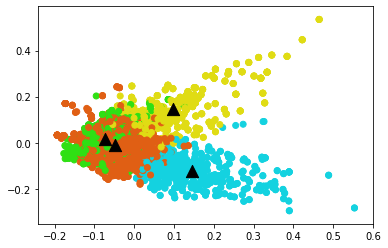

In [22]:
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [117]:
cluster0 = wordvector_fit[labels==0]

In [118]:
df = pd.DataFrame(data = cluster0.todense(), columns = feature_names)

In [119]:
df.head()

,able,access,account,across,actual,add,addition,additional,address,afternoon,...,without,work,working,would,xfilename,xorigin,year,yes,yesterday,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
l = sum(cluster0.todense())

In [128]:
occurences = l[0][0]

In [130]:
*sorted(zip(np.array(l)[0], feature_names))

In [144]:
z =zip(np.array(l)[0], feature_names)

In [155]:
t = [list(el) for el in sorted(zip(np.array(l)[0], feature_names), reverse=True)]

In [157]:
t2 = sorted(zip(np.array(l)[0], feature_names), reverse=True)

'phillip'


#### Agglomerative Clustering
Recursively merges the pair of clusters that minimally increases a given linkage distance.

In [33]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit_predict(dense)

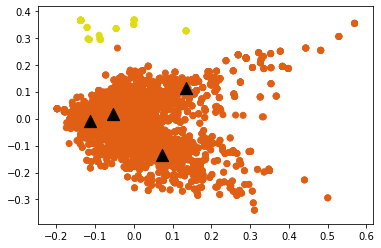

In [37]:
labels=clustering
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

#### Density-Based Spatial Clustering - DBSCAN 
DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Good for data which contains clusters of similar density.

In [39]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=10,n_jobs=-1).fit_predict(dense)


In [56]:
np.unique(labels)

array([0, 1, 2, 3])

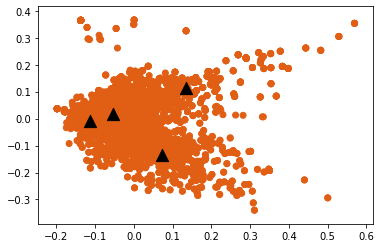

In [40]:
labels=clustering
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

#### GaussianMixture Model GMM

In [44]:
from sklearn.mixture import GaussianMixture

clustering = GaussianMixture(n_components=4).fit_predict(dense)

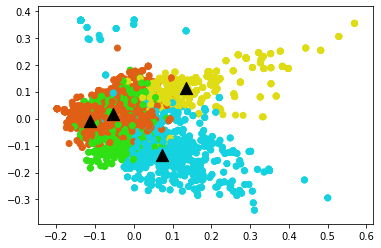

In [45]:
labels=clustering
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

### LatentDirichletAllocation

In [58]:
from sklearn.decomposition import NMF,LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5,learning_method='online',
                                learning_offset=50.,
                                random_state=0)
    
lda.fit(dense)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [271]:
from time import time
from sklearn.decomposition import NMF,LatentDirichletAllocation
n_samples = chunksize
n_features = len(feature_names)
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(dense)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
print_top_words(nmf, feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(dense)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
print_top_words(nmf, feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(dense)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
print_top_words(lda, feature_names, n_top_words)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=5000 and n_features=5068...
done in 17.399s.

Topics in NMF model (Frobenius norm):
Topic #0: gas price would market enron year think get like week know deal new day power need time trade trading one
Topic #1: john arnoldhouectect subject cc pm arnold arnoldhouect jarnoldenroncom margaret jennifer thanks matthew kim forwarded brian im tuesday lavoratoenron hey ina
Topic #2: phillip pm allenhouect forwarded allenhouectect cc from subject tim allen meeting attached hunter heizenrader beldenhouectect strategy phillipkallenenroncom fallonhouectect western robert
Topic #3: request resource approval act upon requested httpitcappscorpenroncomsrrsauthemaillinkaspidpageapproval pending application create type id name click mattsmithenroncom review admin date permanent acceptance
Topic #4: herein chart contained carr soblandercarrfutcom matrix future expressed hot via email web offer link crude nat gas differ solicitation aut

In [272]:
lda.components_

array([[0.10121309, 0.10104932, 0.10122602, ..., 0.10095078, 0.10102213,
        0.10088058],
       [1.14553045, 0.10387149, 0.10939963, ..., 0.10089283, 0.1010323 ,
        2.39314338],
       [0.10086737, 0.10087932, 0.10102346, ..., 0.1008035 , 0.10099706,
        0.10107601],
       ...,
       [0.10094152, 0.10090626, 0.1012683 , ..., 0.10089766, 0.10116992,
        0.10107564],
       [0.10100883, 0.10108461, 0.10118324, ..., 3.09835645, 0.10096945,
        0.10101374],
       [0.10094993, 0.10096136, 0.1009195 , ..., 0.10101384, 0.1010248 ,
        0.10091539]])

### Visualisation with TSNE

In [24]:
from sklearn.manifold import TSNE
wordvector_fit_2d = dense
tSNE = TSNE(n_components=2)
datapoint = tSNE.fit_transform(wordvector_fit_2d)

In [42]:
datapoint

array([[-55.45868  , -72.40874  ],
       [-56.635925 ,  59.925735 ],
       [ 71.41642  ,  33.555115 ],
       ...,
       [  9.147178 ,  17.290276 ],
       [  6.3359804,  50.013416 ],
       [ -3.2846582,  -1.6639067]], dtype=float32)

In [17]:
from sklearn.mixture import GaussianMixture

clusteringGMM = GaussianMixture(n_components=4).fit_predict(dense)

In [92]:
%matplotlib inline

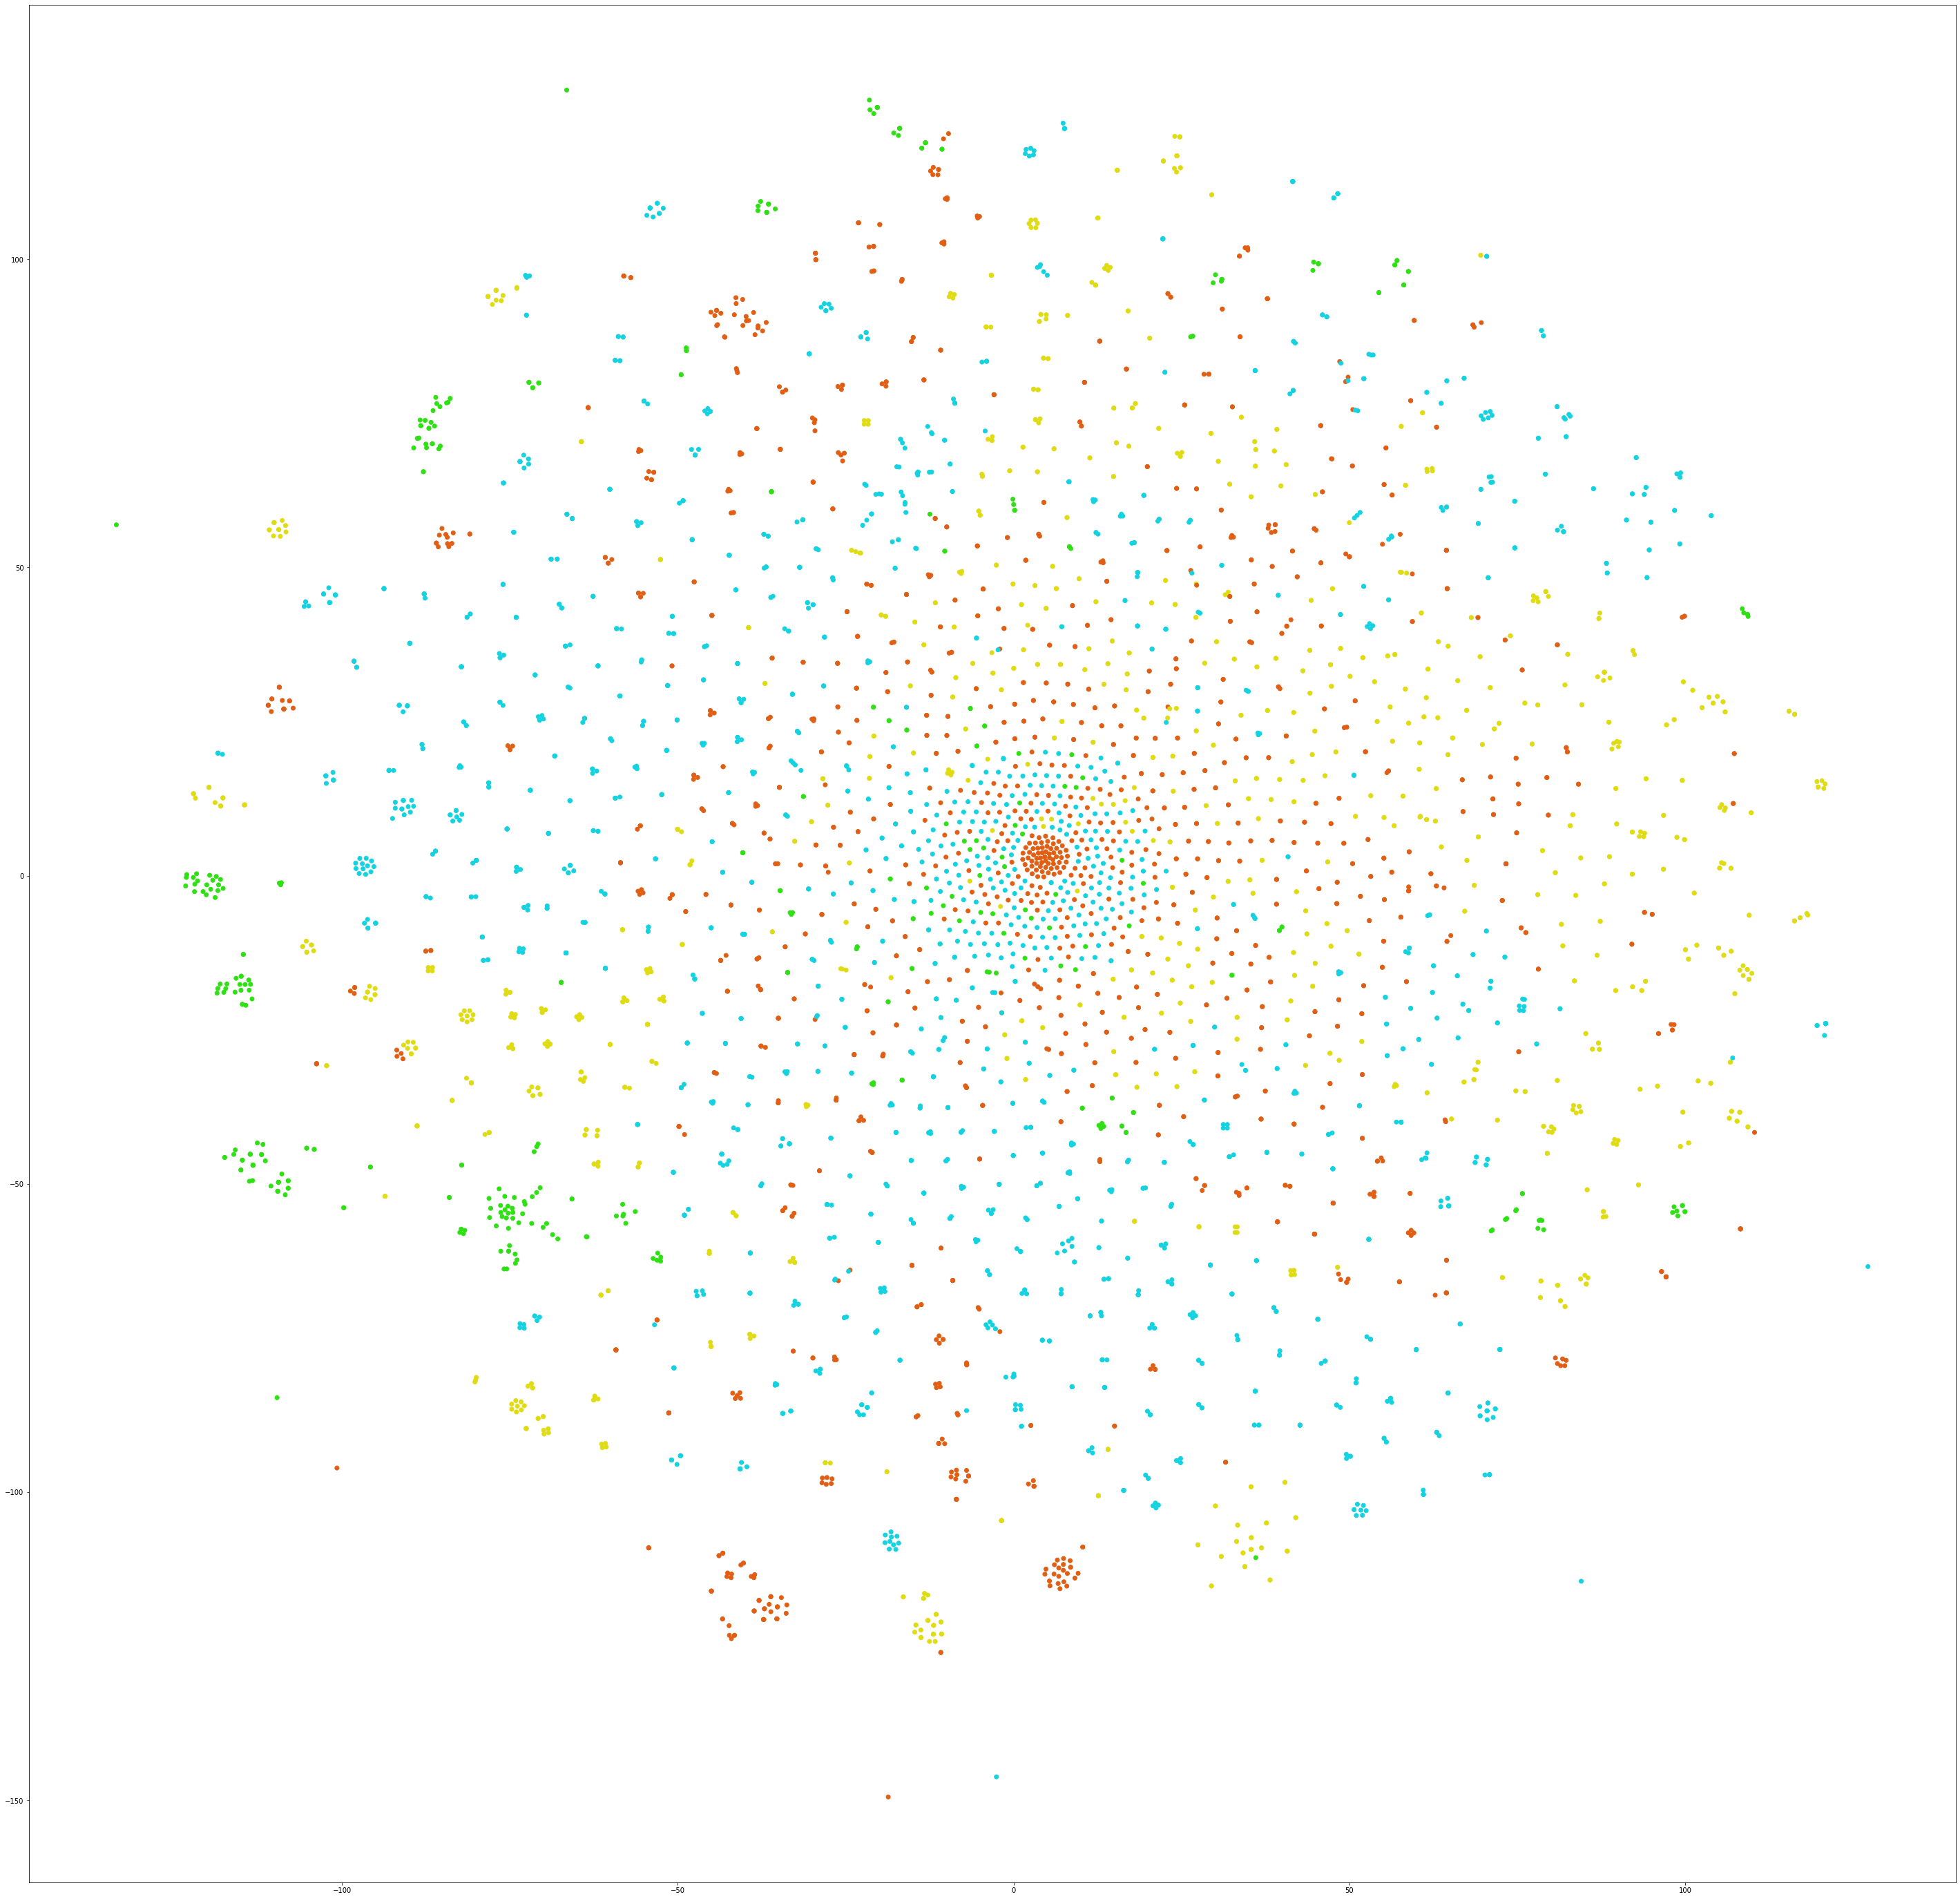

In [93]:
labels=clusteringGMM
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.figure(figsize=(50,50))
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)


#centroids = clf.cluster_centers_
#centroidpoint = pca.transform(centroids)
#plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [95]:
from sklearn.cluster import DBSCAN

clusteringDBSCAN = DBSCAN(eps=0.3, min_samples=10,n_jobs=-1).fit_predict(dense)

In [96]:
np.unique(clusteringDBSCAN)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [97]:
labels

array([0, 3, 0, ..., 0, 1, 2])

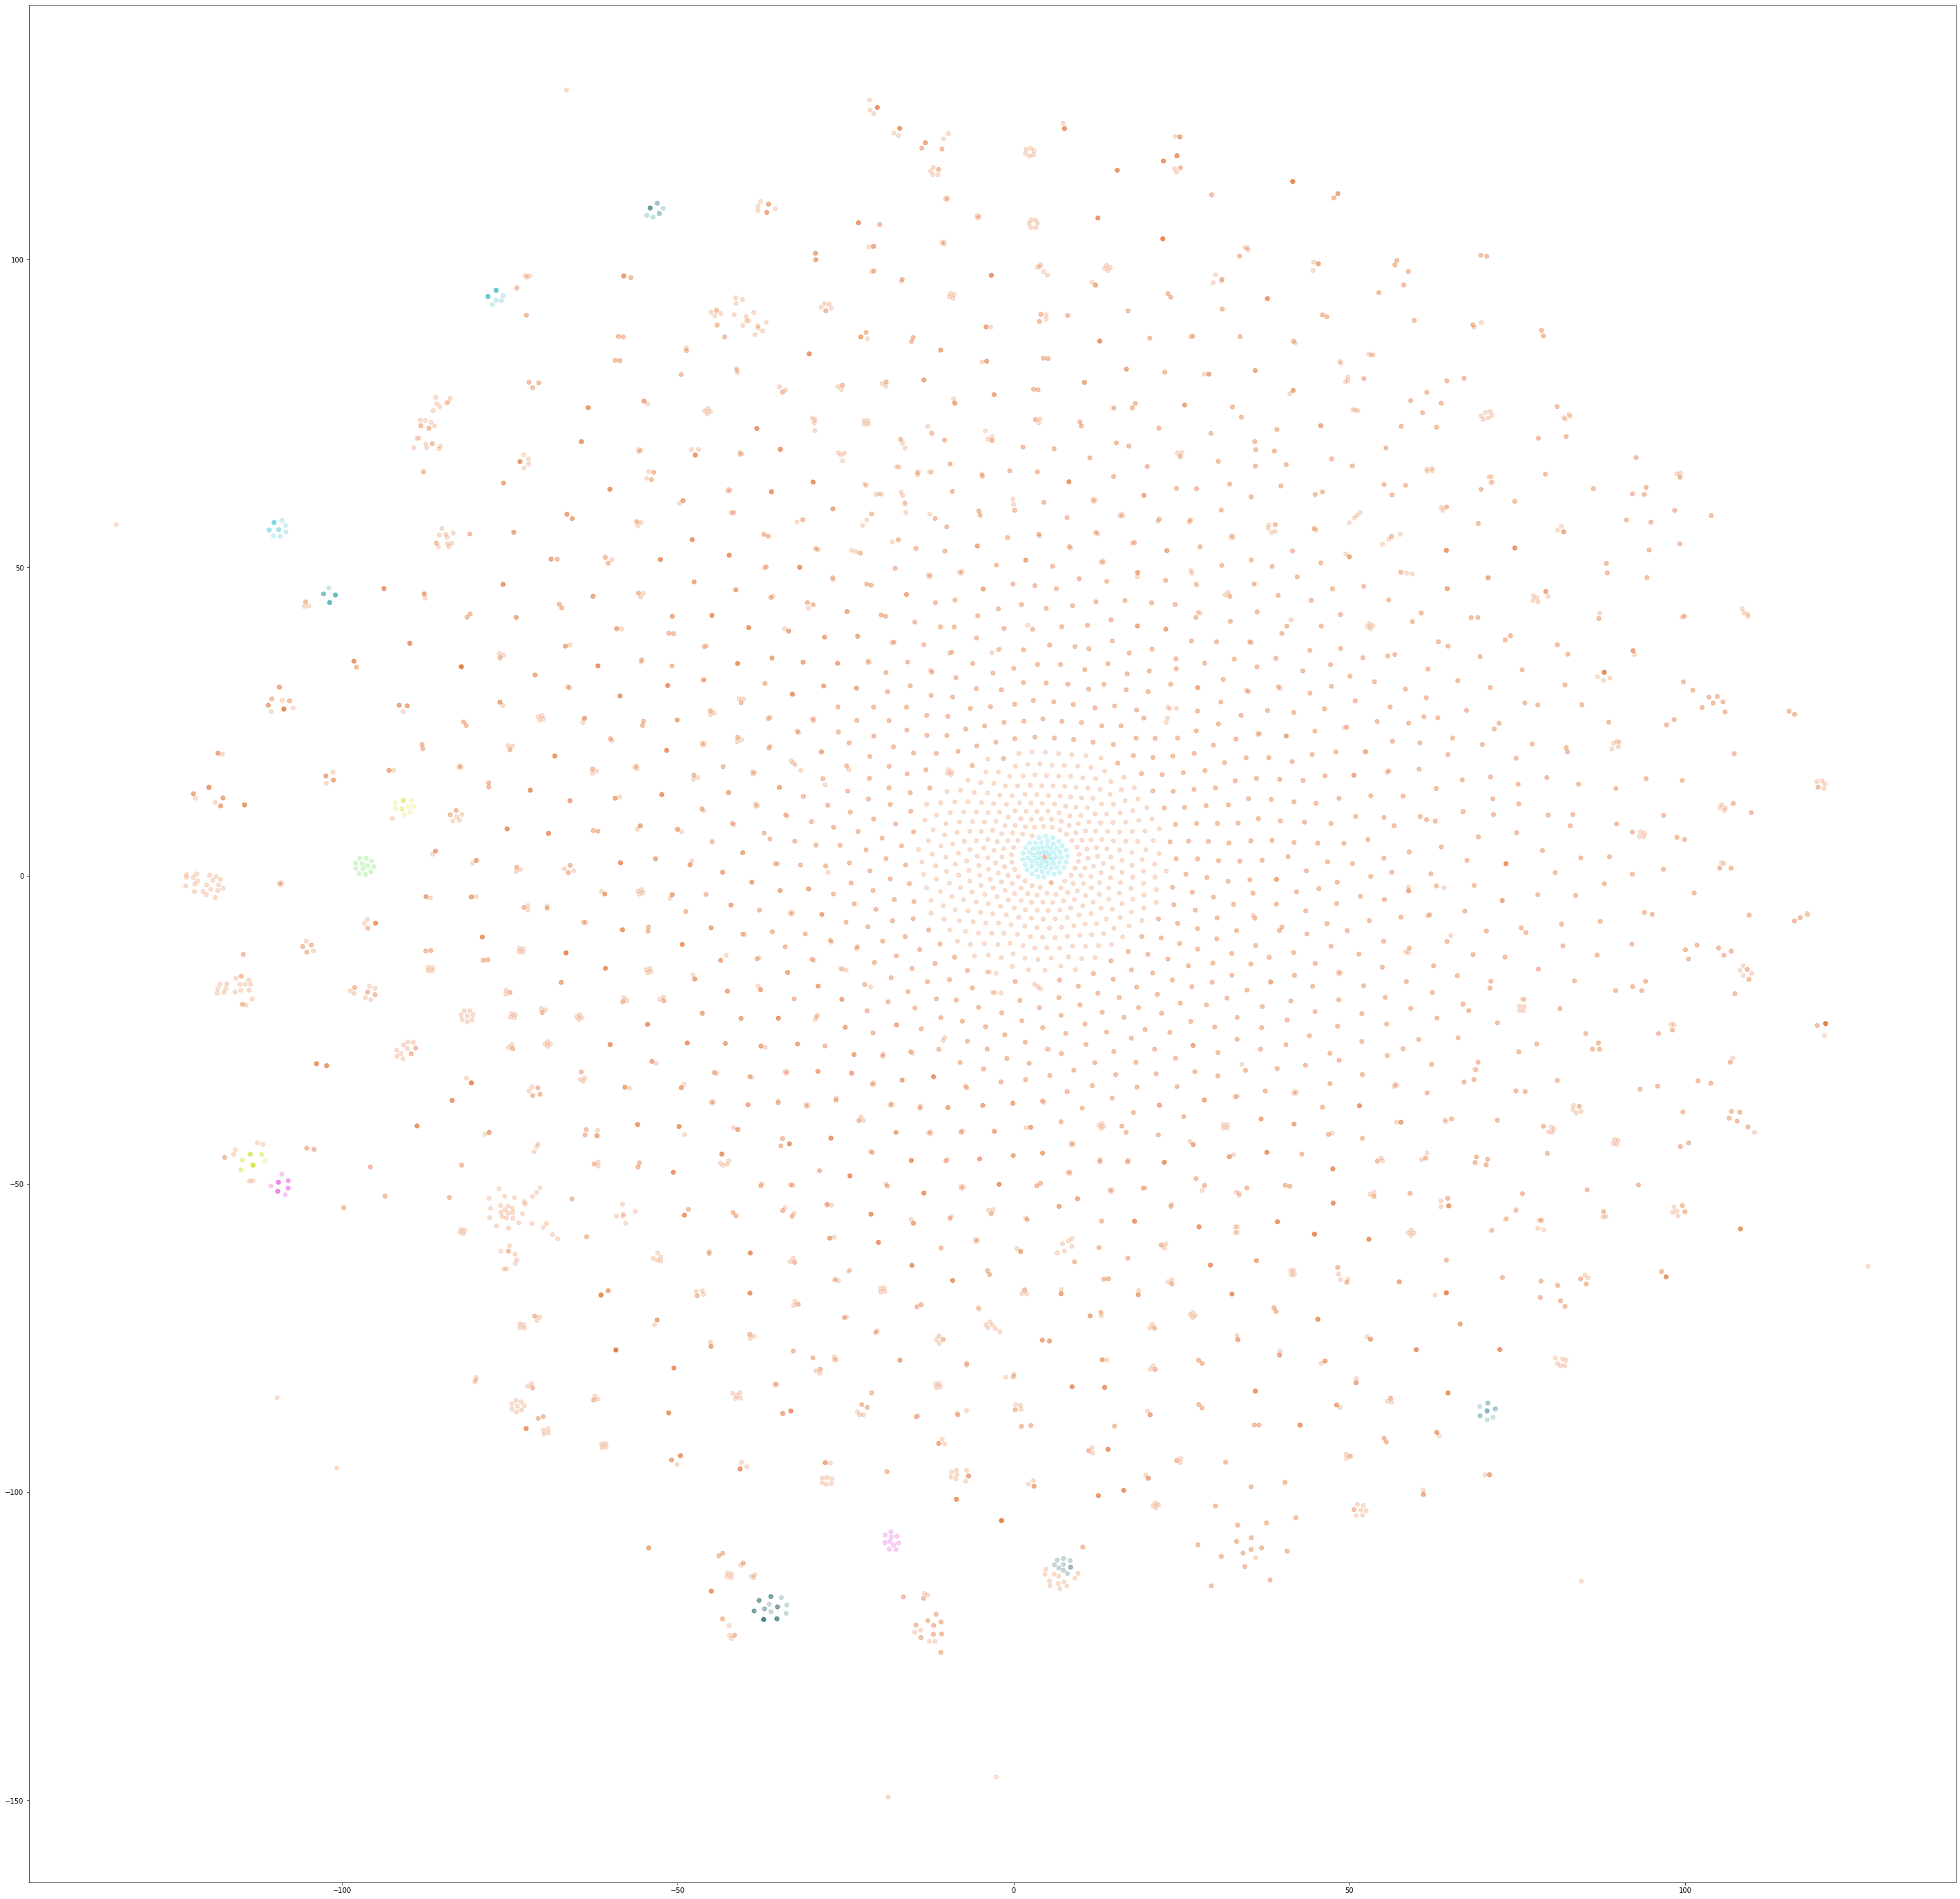

In [100]:
labels = clusteringDBSCAN
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0", "#12bdc9", "#10a8b3", "#0e939c",
         "#0c7e86", "#0a6970", "#085459", "#063f43", "#e014d2","#e014d2", "#d2e014"]
color = [label[i+1] for i in labels]
plt.figure(figsize=(50,50))
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color, alpha=0.2)

#centroids = clf.cluster_centers_
#centroidpoint = pca.transform(centroids)
# plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [78]:
from sklearn.manifold import TSNE
wordvector_fit_2d = dense
tSNE = TSNE(n_components=2)
datapoint = tSNE.fit_transform(wordvector_fit_2d)

In [ ]:
N = 4
clf = KMeans(n_clusters=N,
             max_iter=50,
             init='k-means++',
             n_init=4)
labels = clf.fit_predict(wordvector_fit)

label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0", "#12bdc9", "#10a8b3", "#0e939c",
         "#0c7e86", "#0a6970", "#085459", "#063f43", "#e014d2", "#d2e014"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color, alpha=0.2)

#centroids = clf.cluster_centers_
#centroidpoint = pca.transform(centroids)
# plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

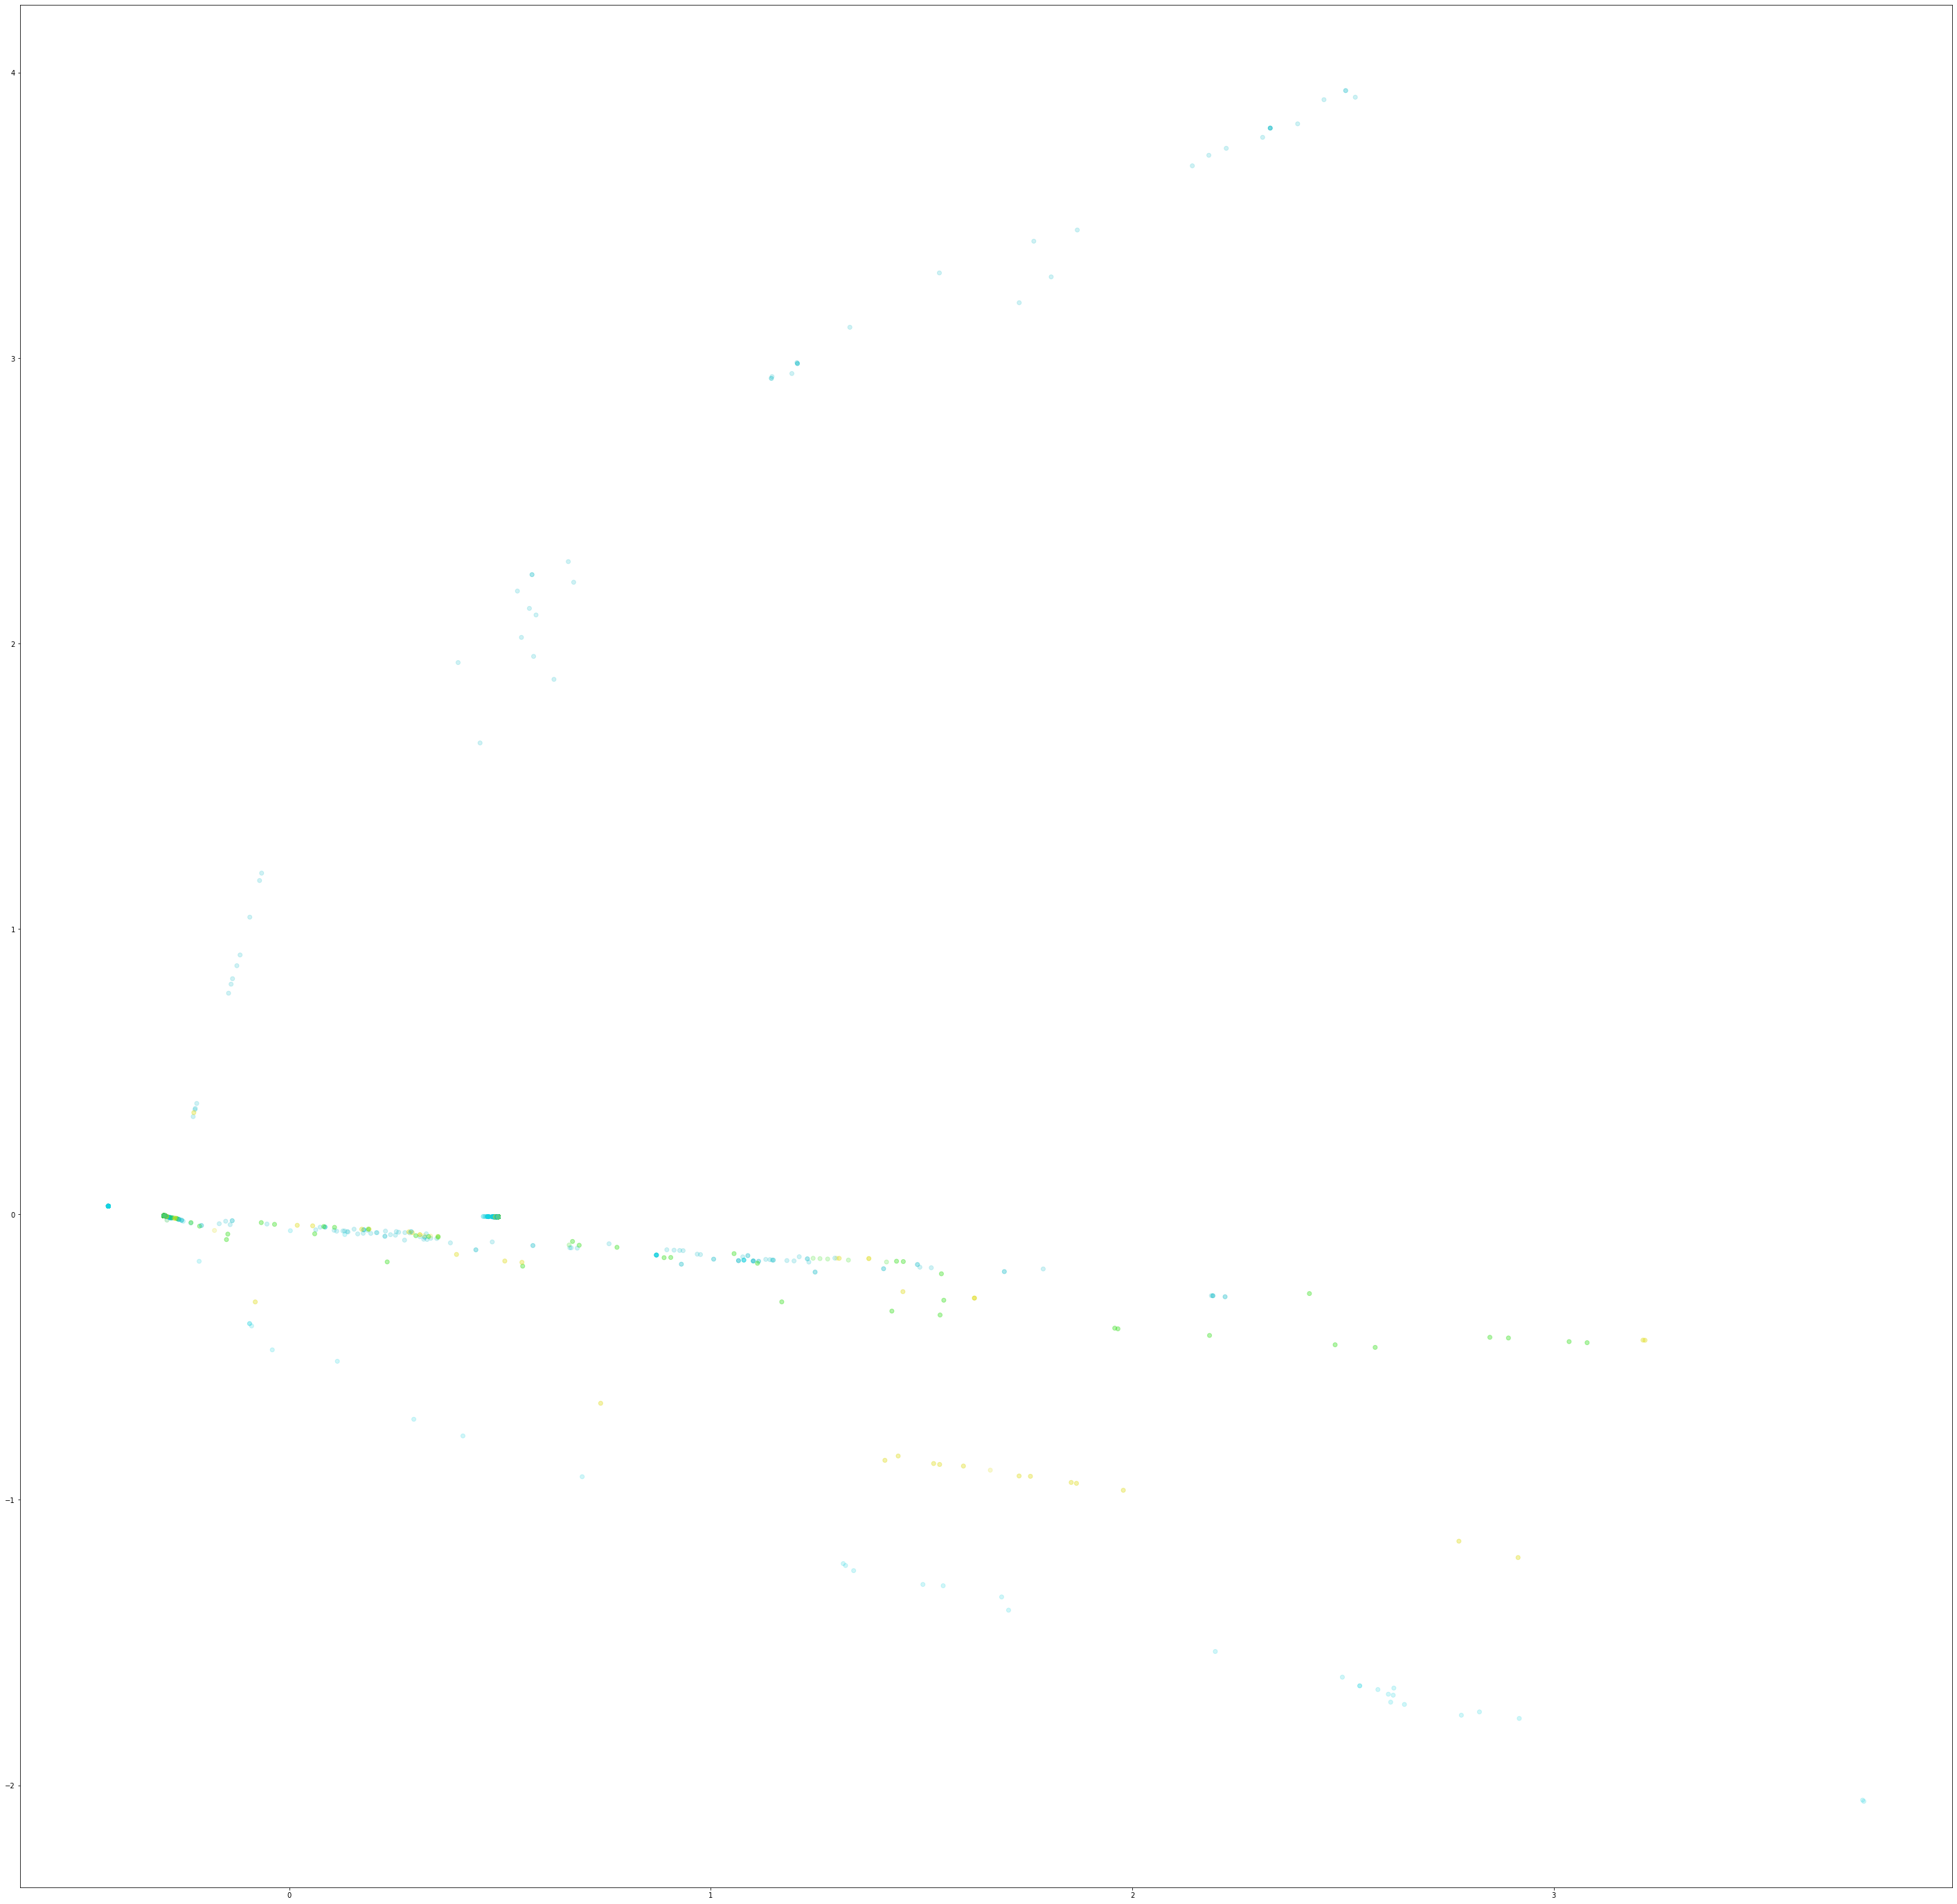

In [18]:
from sklearn.manifold import Isomap
wordvector_fit_2d = dense
isomap = Isomap(n_components=2)
datapoint = isomap.fit_transform(wordvector_fit_2d)

labels = clusteringGMM
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0", "#12bdc9", "#10a8b3", "#0e939c",
         "#0c7e86", "#0a6970", "#085459", "#063f43", "#e014d2","#e014d2", "#d2e014"]
color = [label[i+1] for i in labels]
plt.figure(figsize=(50,50))
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color, alpha=0.2)

#centroids = clf.cluster_centers_
#centroidpoint = pca.transform(centroids)
# plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()


## LDAvis : 

In [1]:
import pyLDAvis

In [34]:
t = pd.read_csv("cleaned_small_email.csv")

In [35]:
data_vis = pyLDAvis.prepare(**t)

TypeError: prepare() got an unexpected keyword argument 'file'

In [28]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation



newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
docs_raw = newsgroups.data
print(len(docs_raw))



11314


In [36]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(docs_raw)
print(dtm_tf.shape)


(11314, 9144)


In [37]:
tf_vectorizer_mine = CountVectorizer(max_df = 0.5, 
                                min_df = 10)
dtm_tf_mine = tf_vectorizer_mine.fit_transform(t.message.dropna())
print(dtm_tf_mine.shape)


(4890, 4429)


In [38]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)
print(dtm_tfidf.shape)

/home/kevin/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1813: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


(11314, 9144)


In [39]:
tfidf_vectorizer_mine = TfidfVectorizer(**tf_vectorizer_mine.get_params())
dtm_tfidf_mine = tfidf_vectorizer_mine.fit_transform(t.message.dropna())
print(dtm_tfidf_mine.shape)

(4890, 4429)


In [40]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [41]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/home/kevin/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.080525  0.084967       1        1  10.698914
14     0.196207  0.062185       2        1  10.077951
0     -0.102869 -0.170439       3        1   9.104501
18     0.054788 -0.103025       4        1   7.036540
13     0.125707  0.045466       5        1   6.281324
8     -0.128318 -0.186213       6        1   5.411451
19    -0.012272 -0.152626       7        1   5.387479
12     0.094636  0.071910       8        1   5.377476
9     -0.124044  0.010609       9        1   4.547461
7     -0.030445 -0.011852      10        1   4.498512
5      0.142672  0.071664      11        1   4.342297
1     -0.061581 -0.055212      12        1   4.146615
15     0.069750 -0.060217      13        1   4.078443
2      0.110436 -0.003365      14        1   3.673889
11    -0.138638 -0.110874      15        1   3.391038
3     -0.176262 -0.024068      16        1   3.240042
17     0.115595  0.110588      17        1   2.977799
4      0.038802  0.044731      18        1   2.548118
10     0.079317  0.034016      19        1   2.216235
16    -0.334006  0.341754      20        1   0.963914, topic_info=     Category         Freq        Term        Total  loglift  logprob
5016  Default  4601.000000         max  4601.000000  30.0000  30.0000
2653  Default  2438.000000         edu  2438.000000  29.0000  29.0000
3523  Default  1945.000000         god  1945.000000  28.0000  28.0000
4497  Default  1211.000000         key  1211.000000  27.0000  27.0000
7677  Default  1250.000000       space  1250.000000  26.0000  26.0000
...       ...          ...         ...          ...      ...      ...
8805  Topic20    15.110336     virtual   134.053142   2.4591  -6.2580
5140  Topic20    13.665991         mil   113.450206   2.5255  -6.3585
6642  Topic20    15.259194     reality   189.037514   2.1252  -6.2482
7221  Topic20    15.126340  scientific   248.731356   1.8420  -6.2570
2749  Topic20    13.682255         end   852.822371   0.5095  -6.3573

[1419 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
20       11  0.929034     absolutes
20       17  0.038710     absolutes
37       12  0.032754  accelerators
37       13  0.032754  accelerators
37       14  0.884362  accelerators
...     ...       ...           ...
9113     19  0.022005         years
9114     14  0.972649         yeast
9132      9  0.041934       yzerman
9132     18  0.922552       yzerman
9134      6  0.949301        zenith

[5975 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 15, 1, 19, 14, 9, 20, 13, 10, 8, 6, 2, 16, 3, 12, 4, 18, 5, 11, 17])

In [42]:
# for TF DTM
lda_tf_mine = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf_mine.fit(dtm_tf_mine)
# for TFIDF DTM
lda_tfidf_mine = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf_mine.fit(dtm_tfidf_mine)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [43]:
pyLDAvis.sklearn.prepare(lda_tf_mine, dtm_tf_mine, tf_vectorizer_mine)

/home/kevin/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13    -0.167937 -0.087309       1        1  9.121840
12     0.067701 -0.147596       2        1  7.528102
9      0.102701 -0.023414       3        1  7.290848
7      0.070544  0.003599       4        1  7.209752
18    -0.194288 -0.026652       5        1  6.722993
16    -0.053429 -0.140712       6        1  6.129267
4     -0.201002 -0.047367       7        1  5.431402
11     0.075367 -0.099623       8        1  5.424430
14     0.004143  0.114483       9        1  5.207422
2      0.100118 -0.043029      10        1  5.006951
5     -0.074007  0.019731      11        1  4.914059
6      0.163161 -0.021162      12        1  4.818634
8     -0.027142  0.096753      13        1  3.653882
3      0.166183 -0.035999      14        1  3.522112
0      0.029596 -0.005955      15        1  3.499468
19     0.106034  0.043453      16        1  3.161988
1     -0.164999 -0.077436      17        1  3.113656
17     0.110405  0.074733      18        1  3.000057
10    -0.047889  0.057605      19        1  2.963812
15    -0.065260  0.345895      20        1  2.279325, topic_info=     Category         Freq      Term        Total  loglift  logprob
3009  Default  3400.000000        pm  3400.000000  30.0000  30.0000
1908  Default  1776.000000     image  1776.000000  29.0000  29.0000
528   Default  1067.000000       buy  1067.000000  28.0000  28.0000
2968  Default  2214.000000   phillip  2214.000000  27.0000  27.0000
2105  Default  2431.000000      john  2431.000000  26.0000  26.0000
...       ...          ...       ...          ...      ...      ...
16    Topic20    56.987180    access   427.692998   1.7657  -5.0383
684   Topic20    55.994503     click   603.008647   1.4046  -5.0559
3003  Topic20    63.534474    please  2600.941442   0.0692  -4.9296
3529  Topic20    48.324541  security   183.038850   2.4495  -5.2032
4228  Topic20    47.771099      view   336.783295   1.8283  -5.2147

[1451 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         1  0.080439  ability
2         3  0.643510  ability
2         5  0.021938  ability
2         7  0.029250  ability
2         9  0.058501  ability
...     ...       ...      ...
4419     15  0.766284    zdnet
4420     15  0.943531   zdnets
4426      7  0.953403     zone
4426      8  0.040570     zone
4427     11  0.943550   zoning

[5449 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 13, 10, 8, 19, 17, 5, 12, 15, 3, 6, 7, 9, 4, 1, 20, 2, 18, 11, 16])

In [44]:
pyLDAvis.sklearn.prepare(lda_tfidf_mine, dtm_tfidf_mine, tfidf_vectorizer_mine, mds='tsne')

/home/kevin/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9      -10.878068   10.538728       1        1  30.421334
6      -60.884026  -75.591820       2        1   7.552228
7       -2.336119  -53.289074       3        1   5.425764
2      -61.385319  -12.914634       4        1   5.296482
18     -28.737743  126.296997       5        1   5.283399
11       1.066606 -123.552811       6        1   4.505887
16      45.140720   -7.947869       7        1   4.409325
10    -140.795975  -98.530548       8        1   3.918958
3       61.531681  -83.240562       9        1   3.881352
17     -72.563057 -140.396881      10        1   3.754157
14      15.984491   63.578186      11        1   3.313426
12    -160.851624   68.945145      12        1   3.295016
5       85.961830   51.922935      13        1   3.131295
0      -99.020836  109.936348      14        1   2.970029
8     -176.764130   -8.681684      15        1   2.377017
13    -117.189880  -37.420200      16        1   2.376138
19     108.829918  -22.946203      17        1   2.368833
4       47.588097  121.934814      18        1   2.081156
15    -106.467834   30.176889      19        1   1.939015
1      -50.613804   59.328842      20        1   1.699191, topic_info=     Category        Freq       Term       Total  loglift  logprob
1908  Default   38.000000      image   38.000000  30.0000  30.0000
3350  Default   43.000000    request   43.000000  29.0000  29.0000
2105  Default  129.000000       john  129.000000  28.0000  28.0000
528   Default   31.000000        buy   31.000000  27.0000  27.0000
275   Default   47.000000   attached   47.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
1957  Topic20    1.569436      index   10.297553   2.1938  -5.6381
2333  Topic20    1.824369       look   38.141103   1.0350  -5.4875
188   Topic20    1.591324  apartment   12.237839   2.0351  -5.6242
3631  Topic20    1.528640       show   15.885067   1.7340  -5.6644
2968  Topic20    1.664770    phillip  130.245187  -0.2847  -5.5791

[1249 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1         4  0.710300          ab
4        16  0.310499         abn
4        17  0.310499         abn
4        19  0.310499         abn
13        1  0.257493  acceptance
...     ...       ...         ...
4419     14  0.445513       zdnet
4422      1  0.204569          zf
4422     18  0.613706          zf
4426      1  0.224523        zone
4426     18  0.673568        zone

[3514 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 8, 3, 19, 12, 17, 11, 4, 18, 15, 13, 6, 1, 9, 14, 20, 5, 16, 2])

In [45]:
pyLDAvis.disable_notebook()

In [46]:
l = pyLDAvis.sklearn.prepare(lda_tfidf_mine, dtm_tfidf_mine, tfidf_vectorizer_mine, mds='tsne')

/home/kevin/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [47]:
l

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9      -10.878068   10.538728       1        1  30.421334
6      -60.884026  -75.591820       2        1   7.552228
7       -2.336119  -53.289074       3        1   5.425764
2      -61.385319  -12.914634       4        1   5.296482
18     -28.737743  126.296997       5        1   5.283399
11       1.066606 -123.552811       6        1   4.505887
16      45.140720   -7.947869       7        1   4.409325
10    -140.795975  -98.530548       8        1   3.918958
3       61.531681  -83.240562       9        1   3.881352
17     -72.563057 -140.396881      10        1   3.754157
14      15.984491   63.578186      11        1   3.313426
12    -160.851624   68.945145      12        1   3.295016
5       85.961830   51.922935      13        1   3.131295
0      -99.020836  109.936348      14        1   2.970029
8     -176.764130   -8.681684      15    